In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from PIL import Image
import numpy as np
mask = np.array(Image.open('./Mask.png').resize((1200, 1500)))

In [3]:
data = pd.read_csv("17f.csv",error_bad_lines=False) #Any csv files containing the names

In [4]:
data.columns = ['Roll', 'Name'] #Change according to the dataframe!

In [5]:
data.Roll

0               0
1       10AG34001
2       10AG10032
3       10AR10009
4       10AE30011
          ...    
6230    18QD30011
6231    18QD30013
6232    18QD30012
6233    18QD30015
6234    18QD30014
Name: Roll, Length: 6235, dtype: object

In [6]:
names = list(data[data['Roll'].str.contains('17EC',na=False)]['Name']) #Get all the names of your dept!

In [7]:
new_names = [x.split(" ")[0] for x in names] #Just the first name for most people

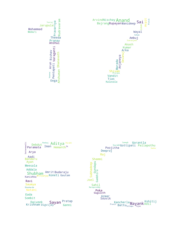

In [8]:
wc = WordCloud( mask=mask, background_color="white",
                max_font_size=32,max_words= 2000,
               random_state=42, width=mask.shape[1]*3,
               height=mask.shape[0]*3,repeat=False)
wc.generate(" ".join(new_names))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
wc.to_file("check.png")